#Hands-on NLP Project: A Comprehensive Guide to Information Extraction using Python


Intermediate NLP Project Python Text
Overview
Information extraction is a powerful NLP concept that will enable you to parse through any piece of text
Learn how to perform information extraction using NLP techniques in Python
 
 Original Source- https://www.analyticsvidhya.com/blog/2020/06/nlp-project-information-extraction/ 

<br/>

# Introduction
I’m a bibliophile – I love pouring through books in my free time and extracting as much knowledge as I can. But in today’s information overload age, the way we read stuff has changed. Most of us tend to skip the entire text, whether that’s an article, a book, or a tutorial – and just read the relevant bits of text.

Let me share a personal example around this. I was recently reading an article about India’s upcoming tour of Australia when I realized how quickly I reached the end of the text. I skimmed over most of it, reading just the headlines and a few bits about Virat Kohli. Here’s a passage from the article:

#Information Extraction example

Can you guess why some of the words are highlighted in red? Yep, I focused on them when reading the article. And this got me thinking – as someone in the Natural Language Processing (NLP) space, could I build a model that could extract these relevant pieces from any given text?

Turns out the answer is yes – thanks to a concept called Information Extraction. We’ll learn more about what information extraction is later, but suffice to say it really helped me fine-tune my NLP skills and build a powerful extraction model that I can use for parsing through most articles.

In this article, I present to you my learnings from when I worked on an Information Extraction project. This is a comprehensive guide so strap in for the ride and enjoy the NLP-fuelled journey!

If you haven’t read about any NLP concepts before, I suggest starting for the below free course:

Introduction to Natural Language Processing (NLP)
 

Table of Contents
* What is Information Extraction?
* How does Information Extraction work?
* Getting Familiar with the NLP Dataset
* Speech Text Pre-Processing
* Splitting our Text into Sentences
* Information Extraction using SpaCy
* Information Extraction #1 – Finding mentions of Prime Minister in the speech
* Information Extraction #2 – Finding initiatives
* Finding patterns in speeches
* Information Extraction #3- Rule on Noun-Verb-Noun phrases
* Information Extraction #4 – Rule on Adjective-Noun phrases
* Information Extraction #5 – Rule on Prepositions
 

# What is Information Extraction?
Text data contains a lot of information but not all of it will be important to you. We might be looking for names of entities, others would want to extract specific relationships between those entities. Our intentions differ according to our requirements.

Imagine having to go through all the legal documents to find legal precedence to validate your current case. Or having to go through all the research papers to find relevant information to cure a disease. There are many more examples like resume harvesting, media analysis, email scanning, etc.

But just imagine having to manually go through all of the textual data and extracting the most relevant information. Clearly, it is an uphill battle and you might even end up skipping some important information.

#Information Extraction using Python

For anyone trying to analyze textual data, the difficult task is not of finding the right documents, but of finding the right information from these documents. Understanding the relationship between entities, understanding how the events have unfolded, or just simply finding hidden gems of information, is clearly what anyone is looking for when they go through a piece of text.

Therefore, coming up with an automated way of extracting the information from textual data and presenting it in a structured manner will help us reap a lot of benefits and tremendously reduce the amount of time we have to spend time skimming through text documents. This is precisely what information extraction strives to achieve.

The task of Information Extraction (IE) involves extracting meaningful information from unstructured text data and presenting it in a structured format.

Using information extraction, we can retrieve pre-defined information such as the name of a person, location of an organization, or identify a relation between entities, and save this information in a structured format such as a database.

Let me show you another example I’ve taken from a cricket news article:

#Information Extraction example

We can extract the following information from the text:

Country – India, Captain – Virat Kohli
Batsman – Virat Kohli, Runs – 2
Bowler – Kyle Jamieson
Match venue – Wellington
Match series – New Zealand
Series highlight – single fifty, 8 innings, 3 formats
This enables us to reap the benefits of powerful query tools like SQL for further analysis. Creating such structured data using information extraction will not only help us in analyzing the documents better but also help us in understanding the hidden relationships in the text.

 

How does Information Extraction work?
Given the capricious nature of text data that changes depending on the author or the context, Information Extraction seems like a daunting task. But it doesn’t have to be that way!

We all know that sentences are made up of words belonging to different Parts of Speech (POS). There are eight different POS in the English language: noun, pronoun, verb, adjective, adverb, preposition, conjunction, and intersection.

The POS determines how a specific word functions in meaning in a given sentence. For example, take the word “right”. In the sentence, “The boy was awarded chocolate for giving the right answer”, “right” is used as an adjective. Whereas, in the sentence, “You have the right to say whatever you want”, “right” is treated as a noun.

This goes to show that the POS tag of a word carries a lot of significance when it comes to understanding the meaning of a sentence. And we can leverage it to extract meaningful information from our text.

Let’s take an example to understand this. We’ll be using the popular spaCy library here.

In [ ]:
# import spacy
import spacy

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

text = "This is a sample sentence."

# create spacy 
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

This -> DET
is -> AUX
a -> DET
sample -> NOUN
sentence -> NOUN
. -> PUNCT


It was that easy to extract words based on their POS tags. But sometimes extracting information purely based on the POS tags is not enough. Have a look at the sentence below:

In [ ]:
text = "The children love cream biscuits"

# create spacy 
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

The -> DET
children -> NOUN
love -> VERB
cream -> NOUN
biscuits -> NOUN


If I wanted to extract the subject and the object from a sentence, I can’t do that based on their POS tags. For that, I need to look at how these words are related to each other. These are called Dependencies.

We can make use of spaCy’s displacy visualizer that displays the word dependencies in a graphical manner:

In [ ]:
from spacy import displacy 
displacy.render(doc, style='dep',jupyter=True)

Pretty cool! This directed graph is known as a dependency graph. It represents the relations between different words of a sentence.

Each word is a node in the Dependency graph. The relationship between words is denoted by the edges. For example, “The” is a determiner here, “children” is the subject of the sentence, “biscuits” is the object of the sentence, and “cream” is a compound word that gives us more information about the object.

The arrows carry a lot of significance here:

The arrowhead points to the words that are dependent on the word pointed by the origin of the arrow
The former is referred to as the child node of the latter. For example, “children” is the child node of “love”
The word which has no incoming arrow is called the root node of the sentence
Let’s see how we can extract the subject and the object from the sentence. Like we have an attribute for POS in SpaCy tokens, we similarly have an attribute for extracting the dependency of a token denoted by dep_:



In [ ]:
for token in doc:
    # extract subject
    if (token.dep_=='nsubj'):
        print(token.text)
    # extract object
    elif (token.dep_=='dobj'):
        print(token.text)

children
biscuits


## Voila! We have the subject and object of our sentence.

Using POS tags and Dependency tags, we can look for relationships between different entities in a sentence. For example, in the sentence “The cat perches on the window sill“, we have the subject, “cat”, the object “window sill”, related by the preposition “on”. We can look for such relationships and much more to extract meaningful information from our text data.

for more on this I suggest going through this amazing tutorial which explains Information Extraction in detail with tons of examples.

https://www.analyticsvidhya.com/blog/2019/09/introduction-information-extraction-python-spacy/?utm_source=blog&utm_medium=nlp-project-information-extraction


#Where Do We Go from Here?
We have briefly spoken about the theory regarding Information Extraction which I believe is important to understand before jumping into the crux of this article.

“An ounce of practice is generally worth more than a ton of theory.” –E.F. Schumacher

In the following sections, I am going to explore a text dataset and apply the information extraction technique to retrieve some important information, understand the structure of the sentences, and the relationship between entities.

So, without further ado, let’s get cracking on the code!

 <br/>

#Getting Familiar with the Text Dataset
The dataset we are going to be working with is the United Nations General Debate Corpus. It contains speeches made by representatives of all the member countries from the year 1970 to 2018 at the General Debate of the annual session of the United Nations General Assembly.

But we will take a subset of this dataset and work with speeches made by India at these debates. This will allow us to stay on track and better understand the task at hand of understanding Information Extraction. This leaves us with 49 speeches made by India over the years, each speech ranging from anywhere between 2000 to 6000+ words.

Having said that, let’s have a look at our dataset:



https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y

In [11]:
# importing the "tarfile" module
import tarfile
  
# open file
file = tarfile.open('UNGDC_1970-2020.tar.gz')
  
# extracting file
file.extractall()
  
file.close()

In [18]:
# Folder path
import glob
import pandas as pd

folders = glob.glob('./TXT/Session 73 - 2018')

# Dataframe
df = pd.DataFrame(columns={'Country','Speech','Session','Year'})

# Read speeches by India
i = 0 
for file in folders:
    
    speech = glob.glob(file+'/IND*.txt')

    with open(speech[0],encoding='utf8') as f:
        # Speech
        df.loc[i,'Speech'] = f.read()
        # Year 
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # Session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # Country
        df.loc[i,'Country'] = speech[0].split('_')[0].split("\\")[-1]
        # Increment counter
        i += 1 
        
df.head()

,Speech,Country,Session,Year
0,"On my own behalf and on behalf of my country, ...",./TXT/Session 73 - 2018/IND,73,2018


I will print a snapshot of one of the speeches to give you a feel of what the data looks like:



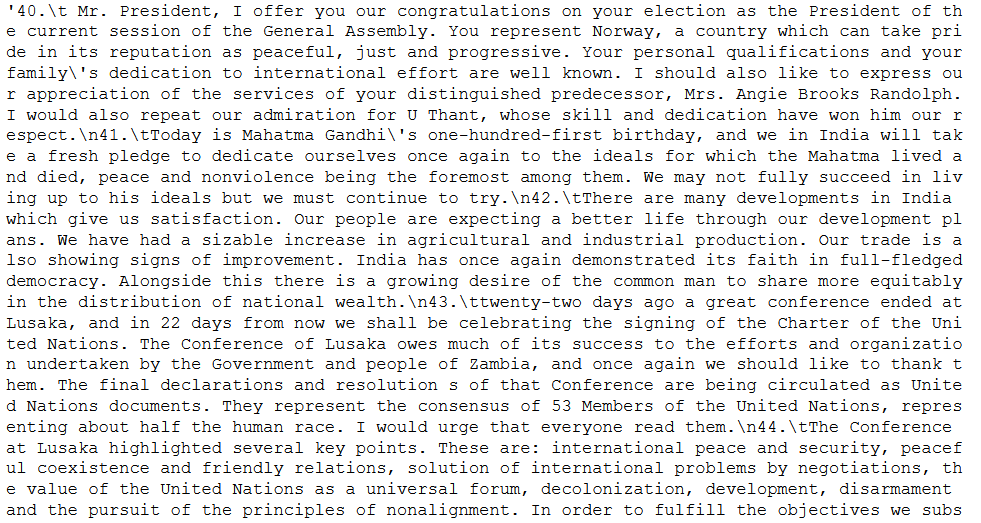

Now let’s start working with our dataset!

 

Speech Text Pre-Processing
First, we need to clean our text data. When I went over a few speeches, I found each paragraph in the speech was numbered to distinctly identify it. There were obviously unwanted characters like newline character, a hyphen, salutations, and apostrophes, like in any other text dataset.

But another unique and unwanted information present were the references made in each speech to other documents. We obviously don’t want that either.

I have written a simple function to clean the speeches. An important point here is that I haven’t used lemmatization or changed the words to lowercase as it has the potential to change the POS tag of the word. We certainly don’t want to do that as you will see in the upcoming subsections.

In [20]:
# function to preprocess speech
import re
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text

# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [21]:
print(df)

                                              Speech  ...                                       Speech_clean
0  On my own behalf and on behalf of my country, ...  ...  On my own behalf and on behalf of my country, ...

[1 rows x 5 columns]


Right, now that we have our minimally cleaned speeches, we can split it up into separate sentences.

#Split the Speech into Different Sentences
Splitting our speeches into separate sentences will allow us to extract information from each sentence. Later, we can combine it to get cumulative information for any specific year.

In [22]:
# split sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

# sentences
df['sent'] = df['Speech_clean'].apply(sentences)

In [23]:
print(df)

                                              Speech  ...                                               sent
0  On my own behalf and on behalf of my country, ...  ...  [On my own behalf and on behalf of my country,...

[1 rows x 6 columns]


In [24]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sent','Year','Len'])

row_list = []

for i in range(len(df)):
    for sent in df.loc[i,'sent']:
    
        wordcount = len(sent.split())
        year = df.loc[i,'Year']

        dict1 = {'Year':year,'Sent':sent,'Len':wordcount}
        row_list.append(dict1)
    
df2 = pd.DataFrame(row_list)

In [25]:
df2.head()

,Year,Sent,Len
0,2018,"On my own behalf and on behalf of my country, ...",35
1,2018,"As a woman, I feel doubly proud that this hon...",15
2,2018,"I also recall, with equal pride, that the fir...",32
3,2018,I also thank former President Miroslav Lajčák...,19
4,2018,We received the tragic news this mor...,16


After performing this operation, we end up with 7150 sentences. Going over them and extracting information manually will be a difficult task. That’s why we are looking at Information Extraction using NLP techniques!

 

#Information Extraction using SpaCy
Now, we can start working on the task of Information Extraction. We will be using the spaCy library for working with the text data. It has all the necessary tools that we can exploit for all the tasks we need for information extraction.

Let me import the relevant SpaCy modules that we will require for the task ahead:

In [27]:
!pip install visualise_spacy_tree

  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [28]:
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
import visualise_spacy_tree
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat']) 

We will need the spaCy Matcher class to create a pattern to match phrases in the text. We’ll also require the displaCy module for visualizing the dependency graph of sentences.

The visualise_spacy_tree library will be needed for creating a tree-like structure out of the Dependency graph. This helps in visualizing the graph in a better way. Finally, IPython Image and display classes are required to output the tree.

But you don’t need to worry about these too much. It will become clear as you look at the code.

 

#Information Extraction #1 – Finding Mentions of Prime Minister in the Speech
When working on information extraction tasks, it is important to manually go over a subset of the dataset to understand what the text is like and determine if anything catches your attention at first glance. When I first went over the speeches, I found many of them referred to what the Prime Minister had said, thought, or achieved in the past.

We know that a country is nothing without its leader. The destination a country ends up in is by and large the result of the able guidance of its leader. Therefore, I believe it is important to extract those sentences from the speeches that referred to Prime Ministers of India, and try and understand what their thinking and perspective were, and also try to unravel any common or differing beliefs over the years.

To achieve this task, I used SpaCy’s Matcher class. It allows us to match a sequence of words based on certain patterns. For the current task, we know that whenever a Prime Minister is referred to in the speech, it will be in one of the following ways:

* Prime Minister of [Country] …
* Prime Minister [Name] …
Using this general understanding, we can come up with a pattern:



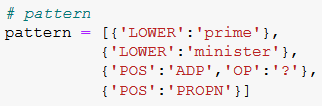

###Let me walk you through this pattern:

Here, each dictionary in the list matches a unique word
The first and second dictionaries match the keyword “Prime Minister” irrespective of whether it is in uppercase or not, which is why I have included the key “LOWER”
The third dictionary matches a word that is a preposition. What I am looking for here is the word “of”. Now, as discussed before, it may or may not be present in the pattern, therefore, an additional key, “OP” or optional, is mentioned to point out just that
Finally, the last dictionary in the pattern should be a proper noun. This can either be the name of the country or the name of the prime minister
The matched keywords have to be in continuation otherwise the pattern will not match the phrase

In [29]:
# function to find sentences containing PMs of India
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern
    pattern = [{'LOWER':'prime'},
              {'LOWER':'minister'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", None, pattern) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
    
    # Only keep sentences containing Indian PMs
    for name in names:
        if (name.split()[2] == 'of') and (name.split()[3] != "India"):
                names.remove(name)
            
    return names

# apply function
df2['PM_Names'] = df2['Sent'].apply(find_names)

Here are some sample sentences from the year 1989 that matched our pattern:



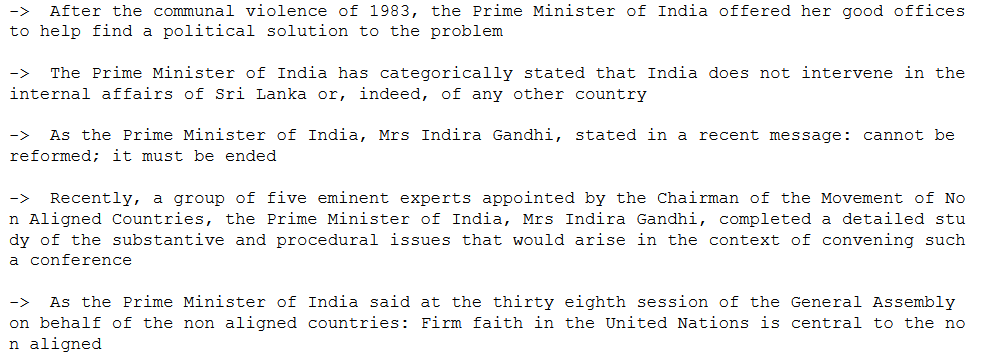

Now, since only 58 sentences out of 7150 total sentences gave an output that matched our pattern, I have summarised the relevant information from these outputs here:

PM Indira Gandhi and PM Jawaharlal Nehru believed in working together in unity and with the principles of the UN
PM Indira Gandhi believed in striking a balance between global production and consumption. She set out policies dedicated to national reconstruction and the consolidation of a secular and pluralistic political system
PM Indira Gandhi emphasized that India does not intervene in the internal affairs of other countries. However, this stand on foreign policy took a U-turn under PM Rajiv Gandhi when he signed an agreement with the Sri Lankan Prime Minister which brought peace to Sri Lanka
Both PM Indira Gandhi and PM Rajiv Gandhi believed in the link between economic development and protection of the environment
PM Rajiv Gandhi advocated for the disarmament of nuclear weapons, a belief that was upheld by India over the years
Indian, under different PMs, has always extended a hand of peace towards Pakistan over the years
PM Narendra Modi believes that economic empowerment and upliftment of any nation involves the empowerment of its women
PM Narendra Modi has launched several schemes that will help India achieve its SGD goals
Using information extraction, we were able to isolate only a few sentences that we required that gave us maximum results.

In [30]:
df2['PM_Names']

0      []
1      []
2      []
3      []
4      []
       ..
126    []
127    []
128    []
129    []
130    []
Name: PM_Names, Length: 131, dtype: object